# Projet diab-ethique


# Import des library


In [156]:
import os
import numpy as np
import pandas as pd
import functools as ft
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline as SKPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as IMBPipeline

# Chargement des données en mémoire

In [157]:
GENERAL_DATA_PATH = os.path.join("Datasets", "general_data")
MANAGER_SURVEY_DATA_PATH = os.path.join("Datasets", "manager_survey_data")
EMPLOYEE_SURVEY_DATA_PATH = os.path.join("Datasets", "employee_survey_data",)

def load_general_data(general_path=GENERAL_DATA_PATH):
    csv_path = os.path.join(general_path, "general_data.csv")
    return pd.read_csv(csv_path)

def load_manager_survey_data(manager_survey_data=MANAGER_SURVEY_DATA_PATH):
    csv_path = os.path.join(manager_survey_data, "manager_survey_data.csv")
    return pd.read_csv(csv_path)

def load_employee_survey_data(employee_survey_data=EMPLOYEE_SURVEY_DATA_PATH):
    csv_path = os.path.join(employee_survey_data, "employee_survey_data.csv")
    return pd.read_csv(csv_path)

general = load_general_data()
manager_survey = load_manager_survey_data()
employee_survey = load_employee_survey_data()

### Rassemblement des plusieurs tables en une seul


In [158]:
##ici faire le merge de toutes les tables
multiArray = [general, manager_survey, employee_survey]
data = ft.reduce(lambda left, right: pd.merge(left,right,on='EmployeeID'), multiArray)

### Visualisation des données

In [159]:
##Faire le .head et .info
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


## Cohérence des données

In [160]:
dtypes = pd.DataFrame(data.dtypes, columns=['Type'])
dtypes['Null'] = data.isnull().sum()
dtypes['N-Unique'] = data.nunique()
dtypes['Unique'] = [data[col].unique() if data[col].dtype == 'object' else [] for col in data.columns]
dtypes.head()
dtypes

,Type,Null,N-Unique,Unique
Age,int64,0,43,[]
Attrition,object,0,2,"[No, Yes]"
BusinessTravel,object,0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
Department,object,0,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,0,29,[]
Education,int64,0,5,[]
EducationField,object,0,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,int64,0,1,[]
EmployeeID,int64,0,4410,[]
Gender,object,0,2,"[Female, Male]"


In [161]:
#fig = plt.figure(figsize=(30,34))
#for idx,i in enumerate(data.columns.tolist()):
#    ax=plt.subplot(8,4,idx+1)
#    sns.countplot(x=i,data=data,ax=ax)
#plt.show()

# Suppresion des données (j'ai les datas) jugées non-éthiques


In [162]:
del data['Gender']
del data['Age']
del data['Over18']
del data['MaritalStatus']
del data['StandardHours']
del data['EmployeeCount']
del data['EmployeeID']

In [163]:
data.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,1.0,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,0.0,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,1.0,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,3.0,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,4.0,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


justification ethique et pas ethique 


In [164]:
convert_collumns = {
    'BusinessTravel': 'category',
    'Department': 'category',
    'EducationField': 'category',
    'JobRole': 'category'
}

data = data.astype(convert_collumns)
data_num = data.select_dtypes(include=[np.number])
data['Attrition'] = data['Attrition'].replace(['Yes','No'],[1,0])


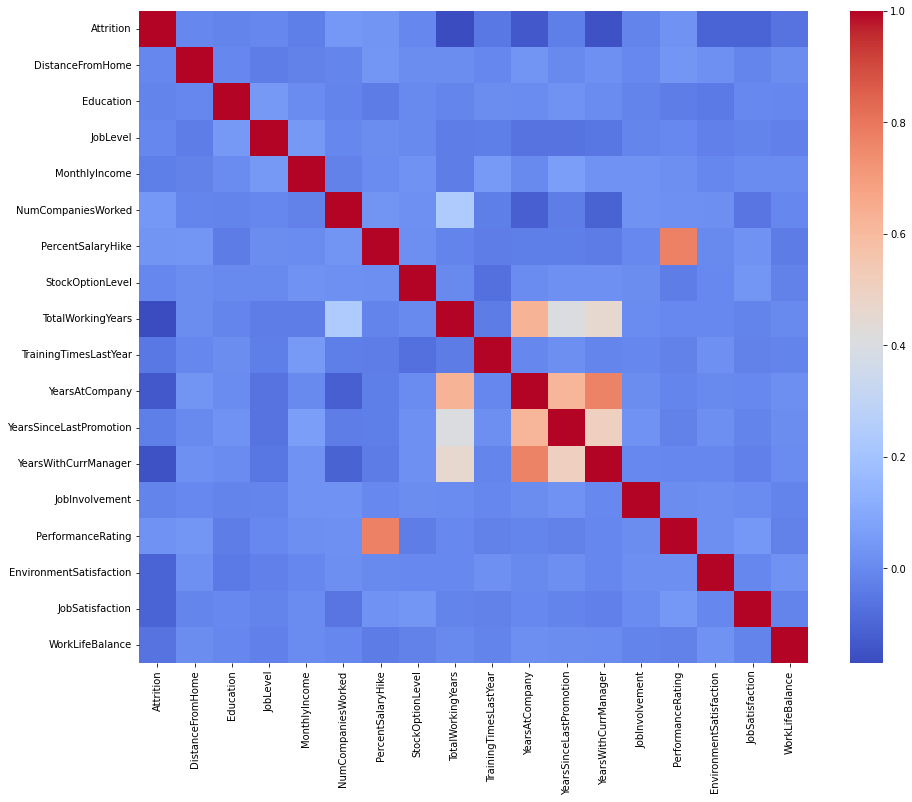

In [165]:
correlation = data.corr()
fig = plt.gcf()
fig.set_size_inches(15,12)
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

In [166]:
"""for i, column in enumerate(data.columns):
    sns.countplot(x=column, data=data).set_title(column, y=1.1, fontsize=30)
    plt.show()
    g = sns.countplot(x= 'Attrition', data=data, hue=column)
    if data[column].nunique()>10:
        plt.legend([],[], frameon=False)
    plt.show()
    print(pd.crosstab(columns=[data.Attrition], index=[data[column]], margins=True, normalize='index'))
    print('\n\n')"""

"for i, column in enumerate(data.columns):\n    sns.countplot(x=column, data=data).set_title(column, y=1.1, fontsize=30)\n    plt.show()\n    g = sns.countplot(x= 'Attrition', data=data, hue=column)\n    if data[column].nunique()>10:\n        plt.legend([],[], frameon=False)\n    plt.show()\n    print(pd.crosstab(columns=[data.Attrition], index=[data[column]], margins=True, normalize='index'))\n    print('\n\n')"

# Exploration des données

### Encoder

In [167]:
categories_attributes = ["Department", "EducationField", "JobRole", 'BusinessTravel']
data_prepared = pd.get_dummies(data, columns=categories_attributes)
data_prepared.head(n=20)

,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,6,2,1,131160,1.0,11,0,1.0,6,...,0,0,0,0,0,0,0,0,0,1
1,1,10,1,1,41890,0.0,23,1,6.0,3,...,0,0,0,0,1,0,0,0,1,0
2,0,17,4,4,193280,1.0,15,3,5.0,2,...,0,0,0,0,0,1,0,0,1,0
3,0,2,5,3,83210,3.0,11,3,13.0,5,...,0,0,0,0,0,0,0,1,0,0
4,0,10,1,1,23420,4.0,12,2,9.0,2,...,0,0,0,0,0,1,0,0,0,1
5,0,8,3,4,40710,3.0,13,0,28.0,5,...,0,0,0,1,0,0,0,0,0,1
6,1,11,2,2,58130,2.0,20,1,5.0,2,...,0,0,0,0,0,1,0,0,0,1
7,0,18,3,2,31430,2.0,22,3,10.0,2,...,0,0,0,0,0,1,0,0,0,1
8,0,1,3,3,20440,0.0,21,0,10.0,2,...,1,0,0,0,0,0,0,0,0,1
9,0,7,4,4,134640,1.0,13,1,6.0,2,...,1,0,0,0,0,0,0,1,0,0


### Scaler

/home/xlabarbe/.local/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/xlabarbe/.local/lib/python3.10/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


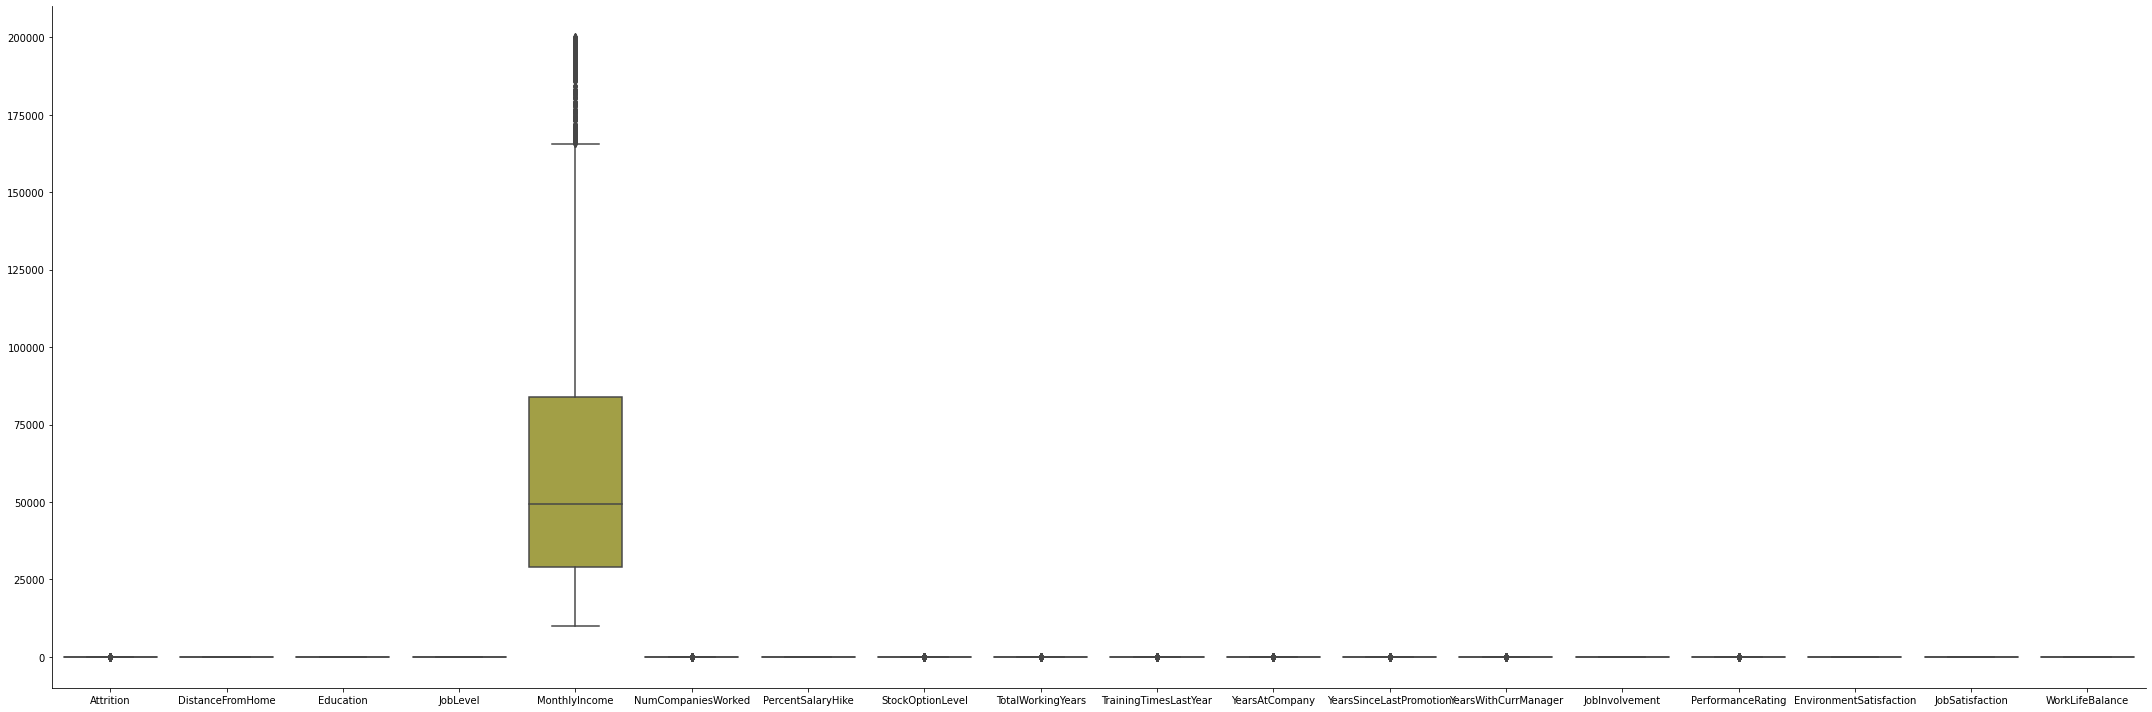

In [168]:
sns.factorplot(data=data, kind='box',size=10,aspect=3)

/home/xlabarbe/.local/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/xlabarbe/.local/lib/python3.10/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


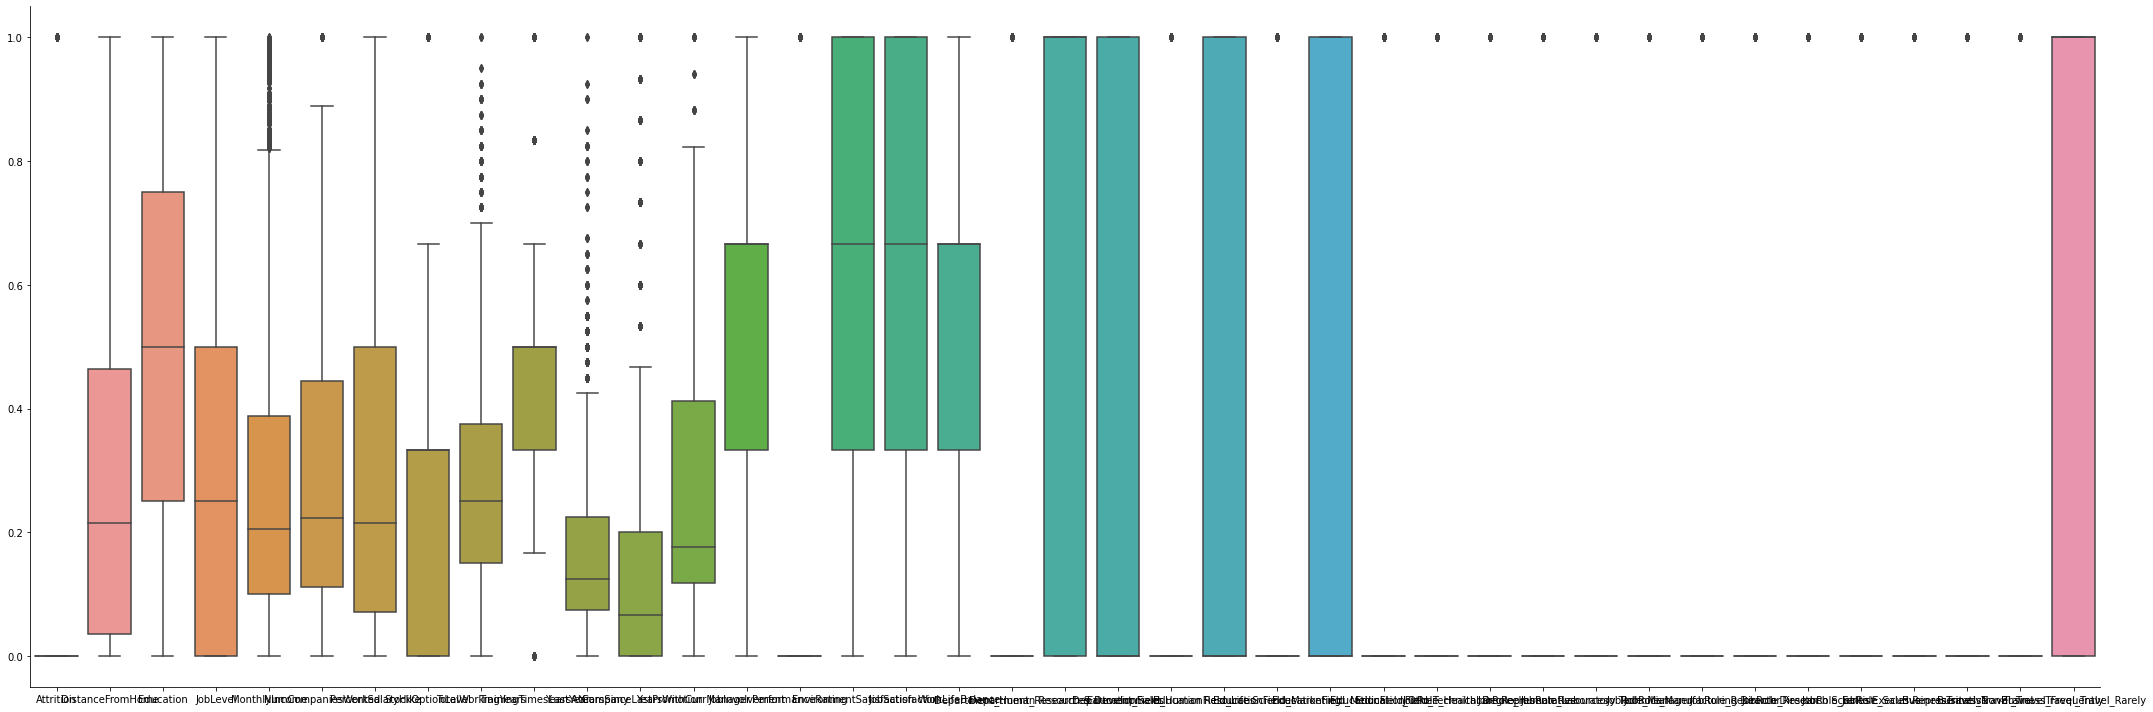

In [169]:
monthly_income_scaled = MinMaxScaler()
data_prepared = pd.DataFrame(monthly_income_scaled.fit_transform(data_prepared), columns = data_prepared.columns)
sns.factorplot(data=data_prepared, kind='box',size=10,aspect=3)

In [170]:
knnImputer = KNNImputer()
data_prepared = pd.DataFrame(knnImputer.fit_transform(data_prepared), columns=data_prepared.columns)
data_prepared.isna().sum()

Attrition                            0
DistanceFromHome                     0
Education                            0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
JobInvolvement                       0
PerformanceRating                    0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other     

In [171]:
numeric_transformer = SKPipeline(steps=[('imputer', KNNImputer()), ('scaler', MinMaxScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordianl_transformer = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])

num_data = list(data_num)
cat_data = ["Department", "EducationField", "JobRole"]
ordi_data = ["BusinessTravel"]

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_data),
    ('cat', categorical_transformer, cat_data),
    ('ordi', ordianl_transformer, ordi_data)
])

In [172]:
data.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,1.0,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,0.0,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,0,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,1.0,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,0,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,3.0,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,0,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,4.0,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [173]:
data_prepared_pl = pd.DataFrame(preprocessor.fit_transform(data))
all_columns = np.concatenate((data.columns.drop(labels=cat_data + ordi_data + ["Attrition"]), preprocessor.named_transformers_['cat'].get_feature_names_out(), ordi_data), axis=0)
data_prepared_pl.columns = all_columns
data_prepared_pl.head(n=20)

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel
0,0.178571,0.25,0.00,0.637546,0.111111,0.000000,0.000000,0.025,1.000000,0.025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.321429,0.00,0.00,0.167457,0.000000,0.857143,0.333333,0.150,0.500000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,0.571429,0.75,0.75,0.964666,0.111111,0.285714,1.000000,0.125,0.333333,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,0.035714,1.00,0.50,0.385045,0.333333,0.000000,1.000000,0.325,0.833333,0.200,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.321429,0.00,0.00,0.070195,0.444444,0.071429,0.666667,0.225,0.333333,0.150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.250000,0.50,0.75,0.161243,0.333333,0.142857,0.000000,0.700,0.833333,0.175,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.357143,0.25,0.25,0.252975,0.222222,0.642857,0.333333,0.125,0.333333,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.607143,0.50,0.25,0.112375,0.222222,0.785714,1.000000,0.250,0.333333,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.000000,0.50,0.50,0.054502,0.000000,0.714286,0.000000,0.250,0.333333,0.225,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.214286,0.75,0.75,0.655872,0.111111,0.142857,0.333333,0.150,0.333333,0.150,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
X = data.drop('Attrition', axis=1)
Y = data['Attrition']

X_m = data_prepared_pl
Y_m = data['Attrition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.2)

In [175]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('(ROC) Curve')
    plt.show()

In [176]:
def getMetrics(model, X, Y):
  Y_pred = model.predict(X)

  accuracy_score_res = accuracy_score(Y,Y_pred)
  precision_score_res = precision_score(Y,Y_pred)
  recall_score_res = recall_score(Y,Y_pred)
  f1_score_res = f1_score(Y,Y_pred)
  auc_score_res = roc_auc_score(Y, Y_pred)     
  fpr, tpr, thresholds = roc_curve(Y, Y_pred)

  print('Accuracy Score : ' + str(accuracy_score(Y,Y_pred)))
  print('Precision Score : ' + str(precision_score(Y,Y_pred)))
  print('Recall Score : ' + str(recall_score(Y,Y_pred)))
  print('F1 Score : ' + str(f1_score(Y,Y_pred)))
  print('AUC: %.2f' % auc_score_res)
  print('Confusion Matrix : \n' + str(confusion_matrix(Y, Y_pred)))
  plot_roc_curve(fpr, tpr)


  return [accuracy_score_res, precision_score_res, recall_score_res, f1_score_res]


0.8498583569405099
0.8328611898016998
0.8498583569405099
0.8470254957507082
0.8413597733711048
0.8498583569405099
0.8498583569405099
0.8526912181303116
0.8494318181818182
0.8267045454545454
Cross Validation :  0.8449507468452229
Accuracy Score : 0.8367346938775511
Precision Score : 0.6206896551724138
Recall Score : 0.11920529801324503
F1 Score : 0.19999999999999998
AUC: 0.55
Confusion Matrix : 
[[720  11]
 [133  18]]


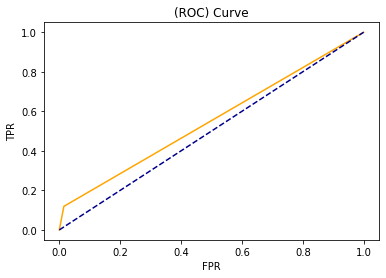

[0.8367346938775511,
 0.6206896551724138,
 0.11920529801324503,
 0.19999999999999998]

In [177]:
m_method = LogisticRegression(solver='liblinear', C=100, random_state=42)
skfolds = StratifiedKFold(n_splits=10)
result = []

# Manual cross validation
for train_index, test_index in skfolds.split(X_train_m, Y_train_m):
    clone_m_method = clone(m_method)
    X_train_folds, X_test_fold = X_train_m.iloc[train_index], X_train_m.iloc[test_index]
    Y_train_folds, Y_test_fold = Y_train_m.iloc[train_index], Y_train_m.iloc[test_index]

    clone_m_method.fit(X_train_folds, Y_train_folds)
    Y_pred = clone_m_method.predict(X_test_fold)
    n_correct = sum(Y_pred == Y_test_fold)
    result.append(n_correct / len(Y_pred))
    print(n_correct / len(Y_pred))

print("Cross Validation : ", np.mean(result))
m_method.fit(X_train_m, Y_train_m)
getMetrics(m_method, X_test_m, Y_test_m)

In [178]:
def showModel(grid, kernel):
    if ((kernel == None) or (kernel == 'rbf' ) or (kernel == 'poly')):
        print("{} not supported with Coef_ Funtion".format(kernel))
    else:
        coefs=sorted(zip(grid.best_estimator_.named_steps['classifier'].coef_[0],X_train.columns.tolist()))
        feat=X_train.columns.tolist()
                
        top10Negative=coefs[:10]
        top10Postive=coefs[::-1][:10]

        res_neg=pd.DataFrame(top10Negative,columns=['Values','Top10NegativeFeatures'])
        res_pos=pd.DataFrame(top10Postive,columns=['Values','Top10PostiveFeatures'])
        res=pd.concat([res_neg,res_pos],axis=1)

        feat=[i[1] for i in coefs]
        coefs1=[i[0] for i in coefs]
        plt.figure(figsize=(10,14))
        plt.barh(range(len(feat)), coefs1, align='center')
        plt.yticks(range(len(feat)), feat)
        plt.show()

In [179]:
def testModel(method, oversampled = False, params = {}, cv = 5, kernel=None):
  if (oversampled):
    fullpipeline = IMBPipeline(steps=[
        ('preprocessor', preprocessor),
        ('sampling', SMOTE()),
        ('classifier', method)
    ])
  else:
    fullpipeline = SKPipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', method)
    ])

  grid = GridSearchCV(fullpipeline, param_grid=params,cv=cv)
  grid.fit(X_train, Y_train)
  print(grid.best_params_)
  showModel(grid, kernel)
  return getMetrics(grid.best_estimator_, X_test, Y_test)

In [180]:
models_bo = []

{'classifier__C': 100, 'classifier__solver': 'liblinear'}


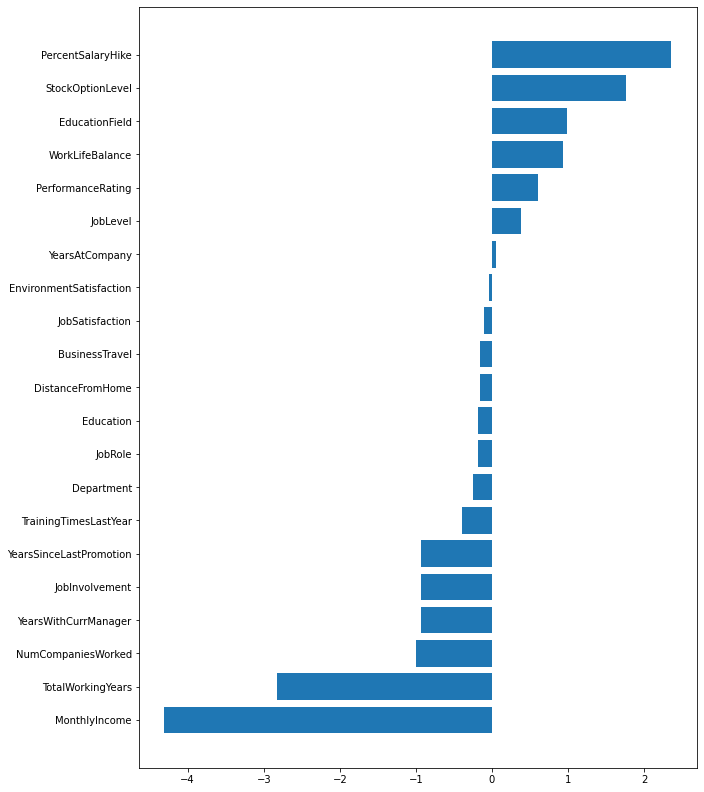

Accuracy Score : 0.8650793650793651
Precision Score : 0.5517241379310345
Recall Score : 0.13114754098360656
F1 Score : 0.21192052980132453
AUC: 0.56
Confusion Matrix : 
[[747  13]
 [106  16]]


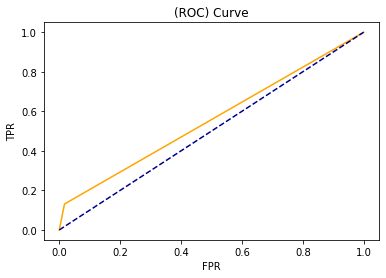

In [181]:
lr = LogisticRegression()

params = {
    'classifier__C': [10, 100],
    'classifier__solver' : ['liblinear']
}

result = testModel(method=lr, params=params, kernel="linear")
models_bo.append(result)

{'classifier__C': 100, 'classifier__kernel': 'poly'}
poly not supported with Coef_ Funtion
Accuracy Score : 0.9954648526077098
Precision Score : 0.9916666666666667
Recall Score : 0.9754098360655737
F1 Score : 0.9834710743801653
AUC: 0.99
Confusion Matrix : 
[[759   1]
 [  3 119]]


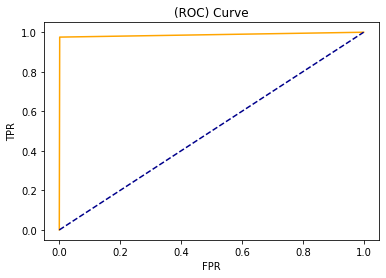

In [182]:
svc = SVC()

params = {
    'classifier__C': [1, 10, 100],
    'classifier__kernel' : ['poly']
}

result = testModel(method=svc, params=params, kernel='poly')
models_bo.append(result)

{'classifier__C': 100, 'classifier__kernel': 'rbf'}
rbf not supported with Coef_ Funtion
Accuracy Score : 0.9988662131519275
Precision Score : 0.991869918699187
Recall Score : 1.0
F1 Score : 0.9959183673469388
AUC: 1.00
Confusion Matrix : 
[[759   1]
 [  0 122]]


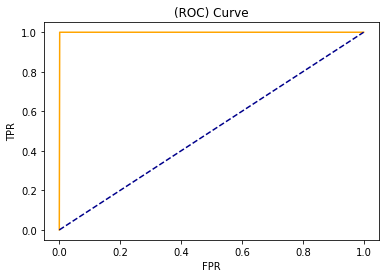

In [183]:
svc = SVC()

params = {
    'classifier__C': [1, 10, 100],
    'classifier__kernel' : ['rbf']
}

result = testModel(method=svc, params=params, kernel='rbf')
models_bo.append(result)

{}


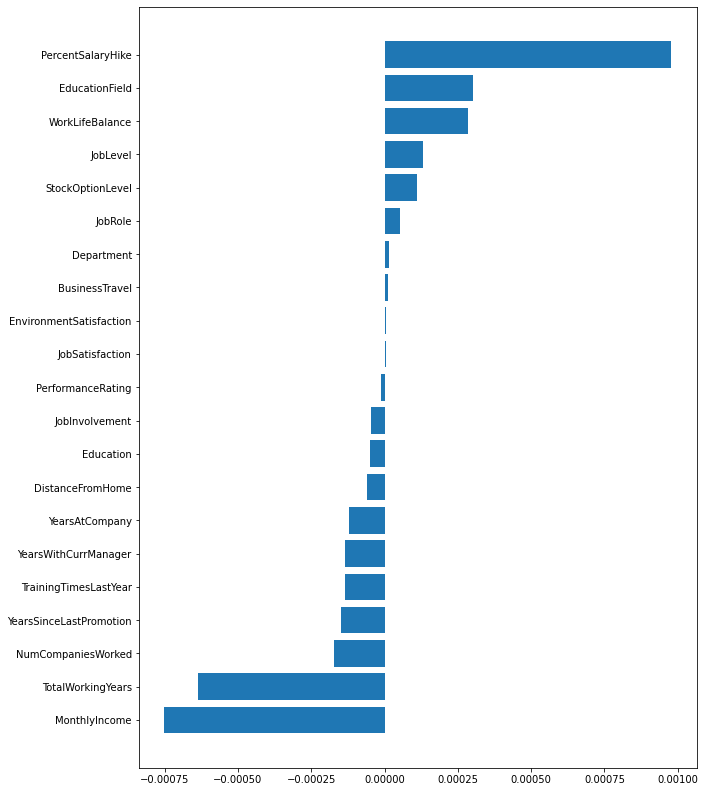

Accuracy Score : 0.8616780045351474
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
AUC: 0.50
Confusion Matrix : 
[[760   0]
 [122   0]]


/home/xlabarbe/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xlabarbe/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


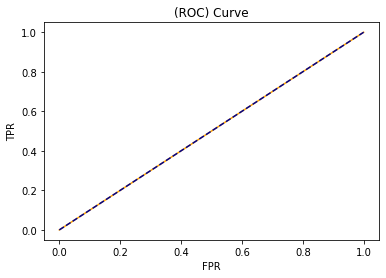

In [184]:
svc = SVC(kernel='linear')

params = {}

result = testModel(method=svc, params=params, kernel='linear')
models_bo.append(result)

## Conclusion

In [185]:
models_name = ['Logistic Regression', 'POLY SVM', 'RBF SVM', 'LINEAR SVM']
columns = ['Accuracy Score', 'Precision score', 'Recall Score', 'F1 Score']
final_models_bo = pd.DataFrame.from_records(models_bo, columns=columns)
final_models_bo.insert(0, 'Model Name', models_name)

final_models_bo

,Model Name,Accuracy Score,Precision score,Recall Score,F1 Score
0,Logistic Regression,0.865079,0.551724,0.131148,0.211921
1,POLY SVM,0.995465,0.991667,0.975410,0.983471
2,RBF SVM,0.998866,0.991870,1.000000,0.995918
3,LINEAR SVM,0.861678,0.000000,0.000000,0.000000


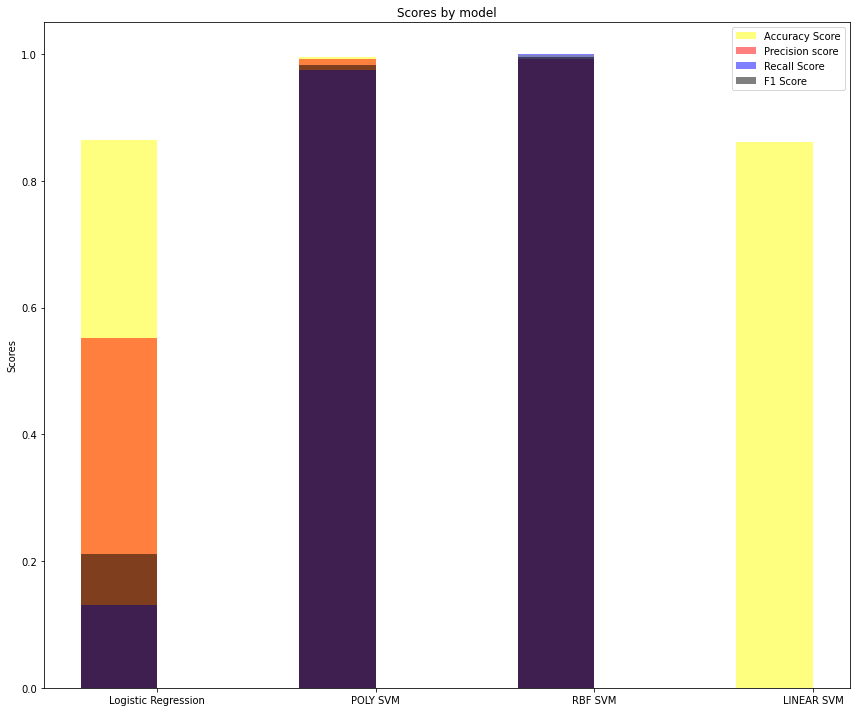

In [186]:
x = np.arange(len(models_name))  # the label location
width = 0.35  # the width of the bars
colors=['yellow', 'red', 'blue', 'black']

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
for i, column in enumerate(columns):
  ax.bar(x - width/2, final_models_bo[column], width, label=column, color=colors[i], alpha = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(models_name)
ax.legend()

fig.tight_layout()

/home/xlabarbe/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


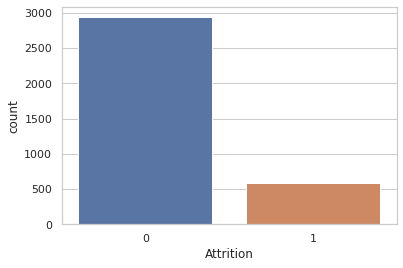

In [188]:
train = pd.DataFrame()
train["Attrition"] = Y_train
sns.set_theme(style="whitegrid")
ax=sns.countplot(train["Attrition"])
plt.show()

In [190]:
sm = SMOTE(random_state = 2) 
X_train_res, Y_train_res = sm.fit_sample(X_train_m, Y_train_m) 
train = pd.DataFrame()
train["Attrition"] = Y_train_res
sns.set_theme(style="whitegrid")
ax=sns.countplot(train["Attrition"])
plt.show()

AttributeError: 'SMOTE' object has no attribute 'fit_sample'